## Read Data

In [12]:
import pandas as pd
 
#this assumes one json item per line in json file
df=pd.read_json("news_category_dataset.json", lines=True)

In [13]:
df.dtypes

short_description            object
headline                     object
date                 datetime64[ns]
link                         object
authors                      object
category                     object
dtype: object

In [14]:
#number of rows (datapoints)
len(df)

124989

In [15]:
df.sample(100)

,short_description,headline,date,link,authors,category
53434,Rabbi Emeritus Haskel Lookstein apparently isn...,Top Rabbi At Jared Kushner's Synagogue To Spea...,2016-07-14,https://www.huffingtonpost.com/entry/rabbi-kus...,Jessica Schulberg,POLITICS
86893,Let everyone not wrapped in tired and disprove...,,2015-06-30,https://www.huffingtonpost.com/entry/post_9671...,"Matthew Fox, ContributorRadical theologian Mat...",RELIGION
84401,Suspenseful scenes hold our attention -- and s...,Study Explains Why Some Movies Are So Freakin'...,2015-07-29,https://www.huffingtonpost.com/entry/study-exp...,Maddie Crum,ARTS & CULTURE
68837,Washington (CNN) -- The emails on Hillary Clin...,Hillary Clinton's Private Email Server Contain...,2016-01-20,https://www.huffingtonpost.comhttp://www.cnn.c...,,POLITICS
70822,"""My hope is that many people in many different...",Korea's First-Ever Openly Gay Student Council ...,2015-12-29,https://www.huffingtonpost.com/entry/korea-ope...,"ByungChul Kim, HuffPost Korea",QUEER VOICES
...,...,...,...,...,...,...
49134,We can’t wait to be their guest.,Emma Watson Flirts With The Beast In 'Beauty A...,2016-09-01,https://www.huffingtonpost.com/entry/emma-wats...,Cole Delbyck,ENTERTAINMENT
80646,"She called judging the show ""one of the worst ...","Ellen DeGeneres Hated Judging 'American Idol,'...",2015-09-09,https://www.huffingtonpost.com/entry/ellen-deg...,Stephanie Marcus,ENTERTAINMENT
122696,"When someone you love is sick, it's like you'r...",5 Things Cancer Taught Me About Being A Doctor,2014-05-15,https://www.huffingtonpost.com/entry/living-wi...,"Dr. Nikhil Joshi, ContributorPhysician, speake...",HEALTHY LIVING
43299,,A Psychotherapist Reacts to Today's Political ...,2016-11-06,https://www.huffingtonpost.com/entry/a-psychot...,"Laurie Hollman, Ph.D., ContributorInfant-Paren...",POLITICS


## Date range
Articles are between July 2014 and July 2018

<AxesSubplot:>

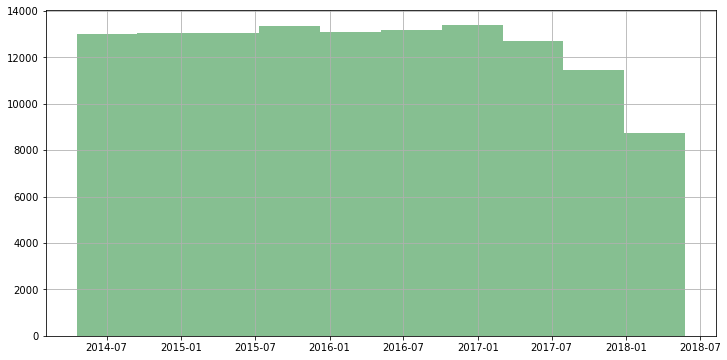

In [16]:
df.date.hist(figsize=(12,6),color='#86bf91',)


## Category Distribution

### Number of categories

In [17]:
len(set(df['category'].values))

31

### Category by count

Most of the articles are related to politics. Education related articles have the lowest volume.

<AxesSubplot:>

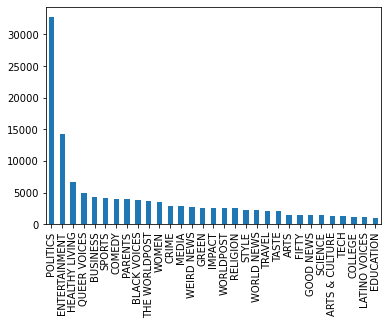

In [18]:
df['category'].value_counts().plot(kind='bar')

In [19]:
df['category'].value_counts()

POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64

In [20]:
df['category']=df['category'].replace({"HEALTHY LIVING": "WELLNESS",
"QUEER VOICES": "GROUPS VOICES",
"BUSINESS": "BUSINESS & FINANCES",
"PARENTS": "PARENTING",
"BLACK VOICES": "GROUPS VOICES",
"THE WORLDPOST": "WORLD NEWS",
"STYLE": "STYLE & BEAUTY",
"GREEN": "ENVIRONMENT",
"TASTE": "FOOD & DRINK",
"WORLDPOST": "WORLD NEWS",
"SCIENCE": "SCIENCE & TECH",
"TECH": "SCIENCE & TECH",
"MONEY": "BUSINESS & FINANCES",
"ARTS": "ARTS & CULTURE",
"COLLEGE": "EDUCATION",
"LATINO VOICES": "GROUPS VOICES",
"CULTURE & ARTS": "ARTS & CULTURE",
"FIFTY": "MISCELLANEOUS",
"GOOD NEWS": "MISCELLANEOUS"})

<AxesSubplot:>

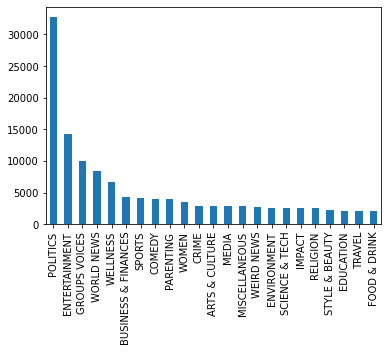

In [21]:
df['category'].value_counts().plot(kind='bar')

In [31]:
import re
import nltk
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
import string 
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

def tokenize_url(url:str):   
    url=url.replace("https://www.huffingtonpost.com/entry/","")
    url = re.sub("[^0-9a-zA-Z\']+"," ",url)
    url=url.replace("https www huffingtonpost comhttps www outsports com ","")

    return url


df['tokenized_url']=df['link'].apply(lambda x:tokenize_url(x))

#description + headline
#df['text_desc_headline'] = df['short_description'] + ' '+ df['headline']




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brett\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [23]:

#cleaning the short description

def tokenize_desc(desc:str):   
    #desc=re.sub("(\W|_)+"," ",desc)
    desc=re.sub("[^0-9a-zA-Z\']+"," ",desc)
    
    return desc

df.loc[df['short_description'] == '','short_description'] = df['tokenized_url'] + ' '+ df['headline']

df['tokenized_desc']=df['short_description'].apply(lambda x:tokenize_desc(x))




In [25]:
#tokenized description + headline + tokenized url

df['text_desc_headline_url'] = df['tokenized_desc'] + ' '+ df['headline']+" " + df['tokenized_url']

df['text_desc_headline_url'] = df['text_desc_headline_url'].apply(
    lambda x: ' '.join([word.text for word in nlp(x) if not word.is_stop ]))

                            


NameError: name 'remove_emoji' is not defined

In [26]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#passing the emoji function to 'text_rare'
df['text_desc_headline_url'] = df['text_desc_headline_url'].apply(remove_emoji)

In [27]:
df.head(2)

,short_description,headline,date,link,authors,category,tokenized_url,tokenized_desc,text_desc_headline_url
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,texas amanda painter mass shooting us 5b081ab4...,She left her husband He killed their children ...,left husband killed children day America 2 M...
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,will smith joins diplo and nicky jam for the o...,Of course it has a song,course song Smith Joins Diplo Nicky Jam 2018...


In [28]:
stemmer = SnowballStemmer('english')

df['text_desc_headline_url'] = df['text_desc_headline_url'].apply(
    lambda x:' '.join([stemmer.stem(y) for y in x.split()]))


In [32]:
from nltk.stem import WordNetLemmatizer
import numpy as np

wordnet_lemmatizer = WordNetLemmatizer()

lemmatize_words = np.vectorize(wordnet_lemmatizer.lemmatize)
        
df['text_desc_headline_url'] = df['text_desc_headline_url'].apply(lambda x: ' '.join(lemmatize_words(x.split())) )

In [33]:
df.head(3)

,short_description,headline,date,link,authors,category,tokenized_url,tokenized_desc,text_desc_headline_url
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,texas amanda painter mass shooting us 5b081ab4...,She left her husband He killed their children ...,left husband kill child day america 2 mass sho...
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,will smith joins diplo and nicky jam for the o...,Of course it has a song,cours song smith join diplo nicki jam 2018 wor...
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT,hugh grant marries us 5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Ebe...,actor longtim girlfriend anna eberstein tie kn...


## Texts for Classification

These are some of the fields we can use for the classification task. We create 3 different versions.

In [34]:
def _reciprocal_rank(true_labels: list, machine_preds: list):
    """Compute the reciprocal rank at cutoff k"""
    
    # add index to list only if machine predicted label exists in true labels
    tp_pos_list = [(idx + 1) for idx, r in enumerate(machine_preds) if r in true_labels]

    rr = 0
    if len(tp_pos_list) > 0:
        # for RR we need position of first correct item
        first_pos_list = tp_pos_list[0]
        
        # rr = 1/rank
        rr = 1 / float(first_pos_list)

    return rr

def compute_mrr_at_k(items:list):
    """Compute the MRR (average RR) at cutoff k"""
    rr_total = 0
    
    for item in items:   
        rr_at_k = _reciprocal_rank(item[0],item[1])
        rr_total = rr_total + rr_at_k
        mrr = rr_total / 1/float(len(items))

    return mrr

def collect_preds(Y_test,Y_preds):
    """Collect all predictions and ground truth"""
    
    pred_gold_list=[[[Y_test[idx]],pred] for idx,pred in enumerate(Y_preds)]
    return pred_gold_list
             
def compute_accuracy(eval_items:list):
    correct=0
    total=0
    
    for item in eval_items:
        true_pred=item[0]
        machine_pred=set(item[1])
        
        for cat in true_pred:
            if cat in machine_pred:
                correct+=1
                break
    
    
    accuracy=correct/float(len(eval_items))
    return accuracy


In [35]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import numpy as np
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def extract_features(df,field,training_data,testing_data,type="binary"):
    """Extract features using different methods"""
    
    logging.info("Extracting features and creating vocabulary...")
    
    if "binary" in type:
        
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
  
    elif "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF BASED FEATURE REPRESENTATION
        #tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True,use_idf=True, max_df=0.95,
                                norm='max', ngram_range=(1, 2), stop_words='english')

        tfidf_vectorizer.fit_transform(training_data[field].values)
        
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer

def get_top_k_predictions(model,X_test,k):
    
    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)

    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]
    
    # GET CATEGORY OF PREDICTIONS
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
    
    preds=[ item[::-1] for item in preds]
    
    return preds
   
    
def train_model(df,field="text_desc",feature_rep="binary",top_k=3):
    
    logging.info("Starting model training...")
    
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(df,random_state = 2000,)

    # GET LABELS
    Y_train=training_data['category'].values
    Y_test=testing_data['category'].values
     
    # GET FEATURES
    X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)

    # INIT LOGISTIC REGRESSION CLASSIFIER
    logging.info("Training a Logistic Regression Model...")
    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
    model=scikit_log_reg.fit(X_train,Y_train)

    # GET TOP K PREDICTIONS
    preds=get_top_k_predictions(model,X_test,top_k)
    
    # GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS - for ease of evaluation
    eval_items=collect_preds(Y_test,preds)
    
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    mrr_at_k=compute_mrr_at_k(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,accuracy,mrr_at_k


## Train a Single Model

### Model  - 1  (binary features with description only)

In [41]:
field='text_desc'
feature_rep='binary'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2021-04-18 20:44:03,574 : INFO : Starting model training...
2021-04-18 20:44:03,677 : INFO : Extracting features and creating vocabulary...
2021-04-18 20:44:06,256 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-04-18 20:46:08,793 : INFO : Starting evaluation...
2021-04-18 20:46:08,845 : INFO : Done training and evaluation.



Accuracy=0.5980862775217614; MRR=0.4805000853388105


### Model - 2 (tfidf features with description only)

In [13]:
field='text_desc'
feature_rep='tfidf'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2019-11-25 12:44:30,242 : INFO : Starting model training...
2019-11-25 12:44:30,308 : INFO : Extracting features and creating vocabulary...
2019-11-25 12:44:33,389 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 12:45:21,446 : INFO : Starting evaluation...
2019-11-25 12:45:21,515 : INFO : Done training and evaluation.



Accuracy=0.6306323604710702; MRR=0.5108380269670774


### Model - 3 (tfidf features with description, headline, url)

In [36]:
field='text_desc_headline_url'
feature_rep='tfidf'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}".format(accuracy))
 

2021-04-22 18:01:03,885 : INFO : Starting model training...
2021-04-22 18:01:03,967 : INFO : Extracting features and creating vocabulary...
2021-04-22 18:01:16,256 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-04-22 18:02:41,583 : INFO : Starting evaluation...
2021-04-22 18:02:41,643 : INFO : Done training and evaluation.



Accuracy=0.8856886840757808


In [ ]:
ngram(1,3)
Accuracy=0.8824244751664106

ngram(1,2)
Accuracy=0.884568612391193

#with cleaning the link a little bit
Accuracy=0.8846006144393241

#with removing non-huffpost articles
Accuracy=0.8817011081162025

#without removing non-huffpost but cleaning the links + filling empty descriptions
Accuracy=0.8855606758832565

#with keeping the apostrophies in the desc
Accuracy=0.8856566820276498

## Check Predictions on Unseen Articles from CNN (not HuffPost our training data)

In [17]:
# https://www.cnn.com/2019/07/19/politics/george-nader-child-porn-sex-charges/index.html
test_features=transformer.transform(["George Aref Nader, who was a key witness in special counsel Robert Mueller's Russia investigation, faces new charges of transporting a minor with intent to engage in criminal sexual activity and child pornography"])
get_top_k_predictions(model,test_features,2)

[['ENTERTAINMENT', 'POLITICS']]

In [18]:
# https://www.cnn.com/2019/07/18/entertainment/khloe-kardashian-true-thompson-video-trnd/index.html
test_features=transformer.transform(["True Thompson makes an adorable cameo in Khloe Kardashian's new makeup tutorial video"])
model.predict(test_features)
get_top_k_predictions(model,test_features,2)

[['STYLE', 'ENTERTAINMENT']]

In [17]:
# https://www.cnn.com/2019/07/12/entertainment/heidi-klum-tom-kaulitz/
test_features=transformer.transform(["Heidi Klum is apparently the latest celeb to get married and not tell us"])
get_top_k_predictions(model,test_features,2)

[['ENTERTAINMENT', 'STYLE']]

In [18]:
# https://www.cnn.com/2019/07/19/investing/dow-stock-market-today/index.html
test_features=transformer.transform(["Stocks end lower as geopolitical fears rise. The Dow and US markets closed lower on Friday, as geopolitical worries overshadowed the hopes of interest rate cuts by the Federal Reserve."])
get_top_k_predictions(model,test_features,2)

[['BUSINESS', 'POLITICS']]

In [19]:
# https://www.cnn.com/2019/07/19/health/astronaut-exercise-iv-faint-scn/index.html
test_features=transformer.transform(["Exercise in space keeps astronauts from fainting when they return to Earth, study says. "])
get_top_k_predictions(model,test_features,2)

[['SCIENCE', 'HEALTHY LIVING']]

## Train Different Types of Models

In [20]:
feature_reps=['binary','counts','tfidf']
fields=['text_desc','text_desc_headline','text_desc_headline_url']
top_ks=[3]

results=[]
for field in fields:
    for feature_rep in feature_reps:
        for top_k in top_ks:
            model,transformer,acc,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
            results.append([field,feature_rep,top_k,acc,mrr_at_k])

2019-11-25 12:46:27,728 : INFO : Starting model training...
2019-11-25 12:46:27,788 : INFO : Extracting features and creating vocabulary...
2019-11-25 12:46:30,778 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 12:49:25,346 : INFO : Starting evaluation...
2019-11-25 12:49:25,419 : INFO : Done training and evaluation.
2019-11-25 12:49:25,462 : INFO : Starting model training...
2019-11-25 12:49:25,523 : INFO : Extracting features and creating vocabulary...
2019-11-25 12:49:28,496 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 12:53:27,625 : INFO : Starting evaluation...
2019-11-25 12:53:27,701 : INFO : Done training and evaluation.
2019-11-25 12:53:27,735 : INFO : Starting model training...
2019-11-25 12:53:27,797 : INFO : Extracting features and creating vocabulary...
2019-11-25 12:53:31,055 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 12:54:17,419 : INFO : Starting evaluation...
2019-11-25 12:54:17,493 : INFO : Done training and evaluation.
2019-11-25 12:54:17,527 : INFO : Starting model training...
2019-11-25 12:54:17,606 : INFO : Extracting features and creating vocabulary...
2019-11-25 12:54:22,294 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 12:57:33,965 : INFO : Starting evaluation...
2019-11-25 12:57:34,034 : INFO : Done training and evaluation.
2019-11-25 12:57:34,072 : INFO : Starting model training...
2019-11-25 12:57:34,132 : INFO : Extracting features and creating vocabulary...
2019-11-25 12:57:38,488 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 13:02:22,456 : INFO : Starting evaluation...
2019-11-25 13:02:22,513 : INFO : Done training and evaluation.
2019-11-25 13:02:22,546 : INFO : Starting model training...
2019-11-25 13:02:22,594 : INFO : Extracting features and creating vocabulary...
2019-11-25 13:02:27,275 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 13:03:19,438 : INFO : Starting evaluation...
2019-11-25 13:03:19,507 : INFO : Done training and evaluation.
2019-11-25 13:03:19,543 : INFO : Starting model training...
2019-11-25 13:03:19,601 : INFO : Extracting features and creating vocabulary...
2019-11-25 13:03:25,400 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 13:06:27,931 : INFO : Starting evaluation...
2019-11-25 13:06:28,002 : INFO : Done training and evaluation.
2019-11-25 13:06:28,057 : INFO : Starting model training...
2019-11-25 13:06:28,127 : INFO : Extracting features and creating vocabulary...
2019-11-25 13:06:34,953 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 13:11:21,625 : INFO : Starting evaluation...
2019-11-25 13:11:21,697 : INFO : Done training and evaluation.
2019-11-25 13:11:21,746 : INFO : Starting model training...
2019-11-25 13:11:21,805 : INFO : Extracting features and creating vocabulary...
2019-11-25 13:11:28,276 : INFO : Training a Logistic Regression Model...


[LibLinear]

2019-11-25 13:12:26,150 : INFO : Starting evaluation...
2019-11-25 13:12:26,222 : INFO : Done training and evaluation.


### Results of Various Models

In [21]:
df_results=pd.DataFrame(results,columns=['text_fields','feature_representation','top_k','accuracy','mrr_at_k'])
df_results.sort_values(by=['text_fields','accuracy'],ascending=False)

,text_fields,feature_representation,top_k,accuracy,mrr_at_k
8,text_desc_headline_url,tfidf,3,0.867256,0.751152
6,text_desc_headline_url,binary,3,0.830165,0.715587
7,text_desc_headline_url,counts,3,0.829653,0.718131
5,text_desc_headline,tfidf,3,0.835925,0.717171
3,text_desc_headline,binary,3,0.794675,0.679169
4,text_desc_headline,counts,3,0.792179,0.677894
2,text_desc,tfidf,3,0.630632,0.510838
0,text_desc,binary,3,0.598054,0.480489
1,text_desc,counts,3,0.595526,0.478436


## Save Model for Future Use


In [28]:
import pickle

model_path="../models/model.pkl"
transformer_path="../models/transformer.pkl"

# we need to save both the transformer -> to encode a document and the model itself to make predictions based on the weight vectors 
pickle.dump(model,open(model_path, 'wb'))
pickle.dump(transformer,open(transformer_path,'wb'))


## Use Loaded Model

In [44]:
loaded_model = pickle.load(open(model_path, 'rb'))
loaded_transformer = pickle.load(open(transformer_path, 'rb'))


test_features=loaded_transformer.transform(["President Trump AND THE impeachment story !!!"])
get_top_k_predictions(loaded_model,test_features,2)


[['POLITICS', 'THE WORLDPOST']]